### Problem Statement

You are a data scientist / AI engineer working on a classification problem to predict the quality of milk. You have been provided with a dataset named **`"milk_quality_data.csv"`**, which includes various parameters that affect milk quality. The dataset comprises the following columns:

- `ph:` The pH level of the milk.
- `temperature:` The temperature of the milk.
- `taste:` Whether the taste is good or bad (1 for good, 0 for bad).
- `odor:` Whether the odor is good or bad (1 for good, 0 for bad).
- `fat:` Whether the fat content is optimal or not (1 for optimal, 0 for not).
- `turbidity:` Whether the turbidity is high or low (1 for high, 0 for low).
- `colour:` The color value of the milk.
- `grade:` The quality of the milk (low, medium, high).
  
Your task is to use this dataset to build and evaluate machine learning models to predict the grade of the milk based on the given parameters. You will perform data preprocessing, exploratory data analysis, and model training using different algorithms, including logistic regression, decision tree, gradient boosting, and XGBoost.

**Dataset credits:** shrijayan (https://www.kaggle.com/datasets/cpluzshrijayan/milkquality/data)

### Data Preparation and Exploration

In [39]:
import pandas as pd
df = pd.read_csv("milk_quality_data.csv")
df.head()

,ph,temperature,taste,odor,fat,turbidity,colour,grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


In [40]:
df.shape

(1059, 8)

In [41]:
df.isnull().sum()

ph             0
temperature    0
taste          0
odor           0
fat            0
turbidity      0
colour         0
grade          0
dtype: int64

In [42]:
# Encoding
df["grade"] = df["grade"].map({'low': 0, 'medium': 1, 'high': 2})

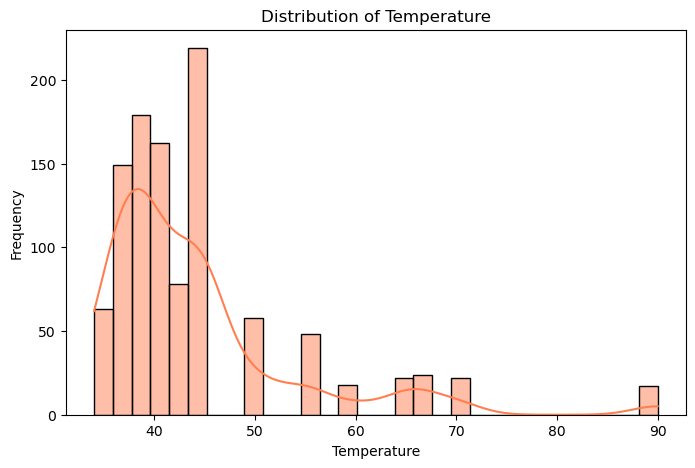

In [43]:
# Visualize the distribution of temperature using histogram.
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='temperature', kde=True, bins=30, color='coral')
plt.title('Distribution of Temperature')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

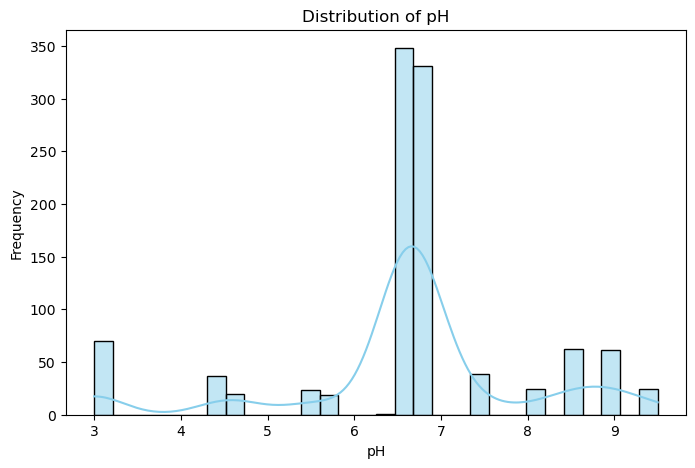

In [44]:
# Visualize the distribution of ph using histogram.
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='ph', kde=True, bins=30, color='skyblue')
plt.title('Distribution of pH')
plt.xlabel('pH')
plt.ylabel('Frequency')
plt.show()

# Model Training Using Basic Models

In [46]:
df.columns

Index(['ph', 'temperature', 'taste', 'odor', 'fat', 'turbidity', 'colour',
       'grade'],
      dtype='object')

In [47]:
from sklearn.model_selection import train_test_split

X=df[["ph", "temperature", "taste", "odor", "fat", "turbidity", "colour"]]
y=df["grade"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=17)

# Logistic Regression

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model = LogisticRegression()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)
cr= classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.82      0.69      0.75       136
           1       0.71      0.87      0.78       116
           2       0.67      0.61      0.63        66

    accuracy                           0.74       318
   macro avg       0.73      0.72      0.72       318
weighted avg       0.75      0.74      0.74       318



C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Decision Tree Classifier

In [51]:
# Step 5: Initialize and train a Decision Tree Classifier using the training data
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)
cr= classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       136
           1       0.98      1.00      0.99       116
           2       0.97      0.97      0.97        66

    accuracy                           0.99       318
   macro avg       0.98      0.98      0.98       318
weighted avg       0.99      0.99      0.99       318



# Gradient Boosting Classifier

In [53]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(n_estimators=50)
model.fit(X_train,y_train)

y_pred = model.predict(X_test)
cr= classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       136
           1       1.00      1.00      1.00       116
           2       0.97      1.00      0.99        66

    accuracy                           0.99       318
   macro avg       0.99      1.00      0.99       318
weighted avg       0.99      0.99      0.99       318



# XGB Classifier

In [56]:
from xgboost import XGBClassifier

model = XGBClassifier(n_estimators=100, max_depth=5, learning_rate=0.1, colsample_bytree=0.5)
model.fit(X_train,y_train)

y_pred = model.predict(X_test)
cr= classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       136
           1       1.00      1.00      1.00       116
           2       0.97      1.00      0.99        66

    accuracy                           0.99       318
   macro avg       0.99      1.00      0.99       318
weighted avg       0.99      0.99      0.99       318

